### Fashion products 

Importing libraries

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Data

In [32]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Exploring DataFrame Dimensions

In [33]:
nombre_lignes, nombre_colonnes = df.shape
print(f"Nombre de lignes : {nombre_lignes}")
print(f"Nombre de colonnes : {nombre_colonnes}")

Nombre de lignes : 23486
Nombre de colonnes : 11


Removing Unnecessary Columns

In [34]:
df = df.drop(['Title', 'Clothing ID', 'Class Name', 'Department Name', 'Division Name'], axis=1)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,60,I had such high hopes for this dress and reall...,3,0,0
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,47,This shirt is very flattering to all due to th...,5,1,6


In [35]:
print(df.isnull().sum())

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
dtype: int64


Handling Missing Values

In [36]:
df.dropna(inplace=True)

In [37]:
print(df)

       Unnamed: 0  Age                                        Review Text  \
0               0   33  Absolutely wonderful - silky and sexy and comf...   
1               1   34  Love this dress!  it's sooo pretty.  i happene...   
2               2   60  I had such high hopes for this dress and reall...   
3               3   50  I love, love, love this jumpsuit. it's fun, fl...   
4               4   47  This shirt is very flattering to all due to th...   
...           ...  ...                                                ...   
23481       23481   34  I was very happy to snag this dress at such a ...   
23482       23482   48  It reminds me of maternity clothes. soft, stre...   
23483       23483   31  This fit well, but the top was very see throug...   
23484       23484   28  I bought this dress for a wedding i have this ...   
23485       23485   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count  
0           4    

duplicate data

In [38]:
df.duplicated().sum()

0

Exploratory Data Analysis (EDA): Descriptive Statistics and Correlation Heatmap

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22641.0,11740.849035,6781.957509,0.0,5872.0,11733.0,17621.0,23485.0
Age,22641.0,43.280376,12.326980,18.0,34.0,41.0,52.0,99.0
Rating,22641.0,4.183561,1.115762,1.0,4.0,5.0,5.0,5.0
Recommended IND,22641.0,0.818868,0.385136,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22641.0,2.630582,5.786164,0.0,0.0,1.0,3.0,122.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Age                      22641 non-null  int64 
 2   Review Text              22641 non-null  object
 3   Rating                   22641 non-null  int64 
 4   Recommended IND          22641 non-null  int64 
 5   Positive Feedback Count  22641 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ MB


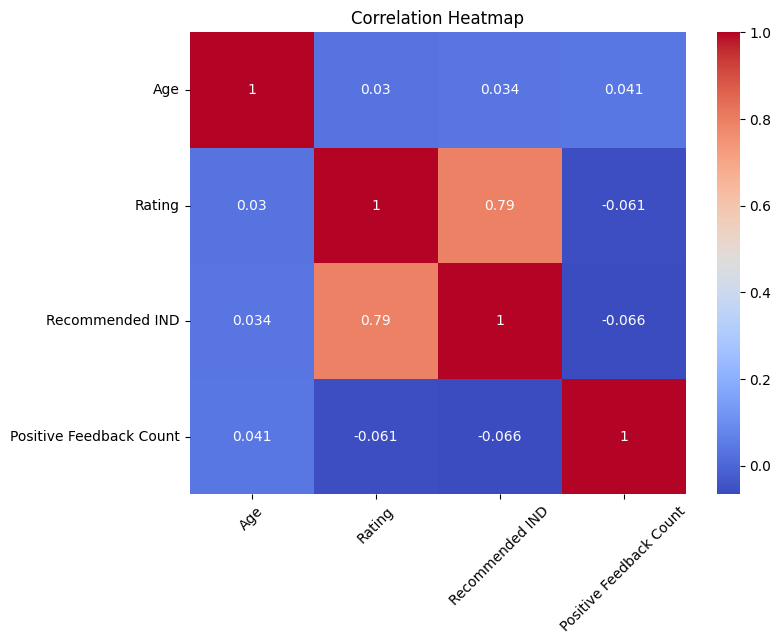

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']


corr_matrix = df[columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)


plt.show()

Recommendation and ratings are showing good correlation, i.e, Directly Proportional to each other

In [42]:

df.dropna(inplace=True)


Addressing Class Imbalance

Class distribution before under-sampling:
1    18540
0     4101
Name: Recommended IND, dtype: int64

Class distribution after under-sampling:
0    4101
1    4101
Name: Recommended IND, dtype: int64


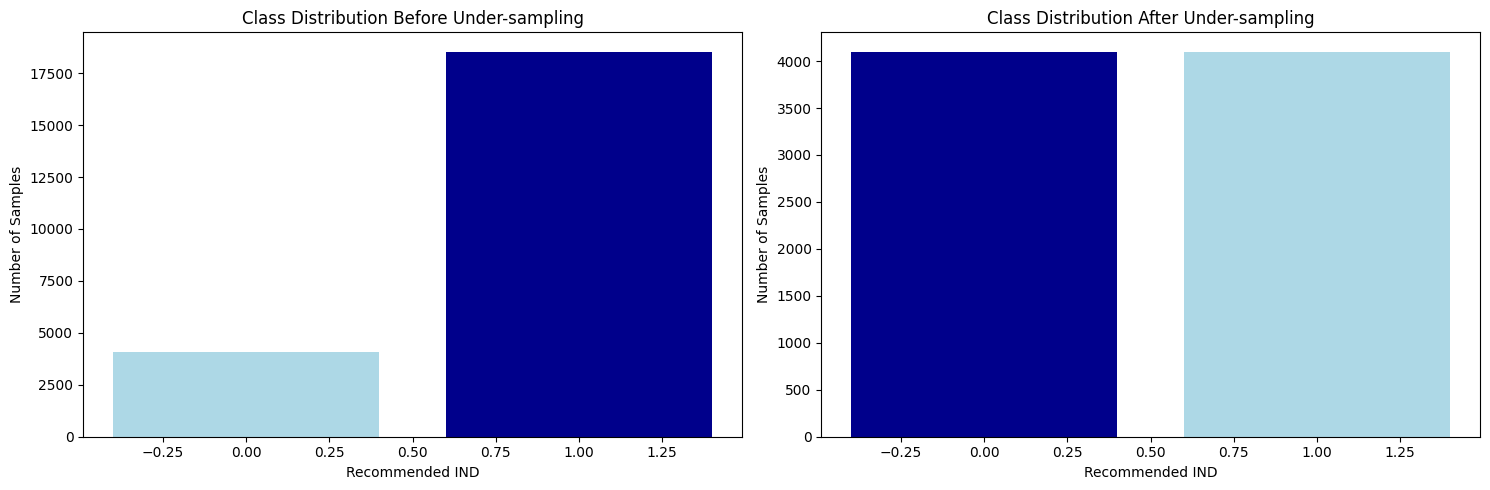

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Specify feature names and class label
features = ['Age', 'Rating', 'Positive Feedback Count']
target_label = 'Recommended IND'

# Separate features and target variable
X = df[features]
y = df[target_label]

# class distribution before under-sampling
print("Class distribution before under-sampling:")
print(y.value_counts())

# Apply RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

#class distribution after under-sampling
print("\nClass distribution after under-sampling:")
print(y_resampled.value_counts())

# Visualize class distributions
plt.figure(figsize=(15, 5))

# Before under-sampling
plt.subplot(1, 2, 1)
plt.bar(y.value_counts().index, y.value_counts().values, color=['darkblue', 'lightblue'])
plt.title('Class Distribution Before Under-sampling')
plt.xlabel('Recommended IND')
plt.ylabel('Number of Samples')

# After under-sampling
plt.subplot(1, 2, 2)
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values, color=['darkblue', 'lightblue'])
plt.title('Class Distribution After Under-sampling')
plt.xlabel('Recommended IND')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()



Building and Evaluating a HistGradientBoostingClassifier 

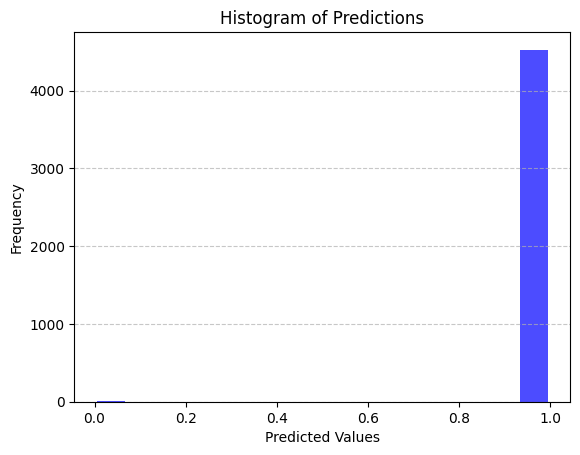

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       812
           1       0.82      1.00      0.90      3717

    accuracy                           0.82      4529
   macro avg       0.58      0.50      0.45      4529
weighted avg       0.73      0.82      0.74      4529



In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



# Target
y = df['Recommended IND']

# Drop it 
X = df.drop('Recommended IND', axis=1)
# "Review Text" is removed 
numerical_features = ['Age', 'Positive Feedback Count']  
X = df[numerical_features]

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X = SimpleImputer(strategy='mean').fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Plotting the histogram of predictions
plt.hist(y_pred, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional metrics
print(classification_report(y_test, y_pred))


Building a Pipeline and some models performance 


Comparative Analysis of Logistic Regression, K-Nearest Neighbors, and Random Forest Models for Recommender Systems


In [45]:

!pip install tabulate



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, accuracy_score
import numpy as np
from tabulate import tabulate


# Split the Data into Training and Testing Sets
X = df.drop(['Recommended IND', 'Review Text'], axis=1)
y = df['Recommended IND']
results = []

# Split the Data into Training and Testing Sets for cross-validation
X_train, temp_set, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(temp_set, y_temp, test_size=0.5, random_state=42)

# Train the Machine Learning Model (Logistic Regression)
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_scores = cross_val_score(logreg_model, X_cv, y_cv, cv=5, scoring='accuracy')  #  can adjust the number of folds (cv) as needed 3-fold to 5-fold.
logreg_model.fit(X_cv, y_cv)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression Model
mae_logreg = mean_absolute_error(y_test, y_pred_logreg)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)
evs_logreg = explained_variance_score(y_test, y_pred_logreg)

print('Logistic Regression Model:')
print('Mean Absolute Error:', mae_logreg)
print('Mean Squared Error:', mse_logreg)
print('R-squared:', r2_logreg)
print('Explained Variance Score:', evs_logreg)
print('Cross-Validation Accuracy:', np.mean(logreg_scores))

# Calculate accuracy on the test set 
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Accuracy (Logistic Regression): {0:.2f}'.format(accuracy_logreg))
results.append(['Logistic Regression', mae_logreg, mse_logreg, r2_logreg, evs_logreg, np.mean(logreg_scores), accuracy_logreg])
# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # by default 5
knn_scores = cross_val_score(knn_model, X_cv, y_cv, cv=5, scoring='accuracy')
knn_model.fit(X_cv, y_cv)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the K-Nearest Neighbors Model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
evs_knn = explained_variance_score(y_test, y_pred_knn)

print('K-Nearest Neighbors Model:')
print('Mean Absolute Error:', mae_knn)
print('Mean Squared Error:', mse_knn)
print('R-squared:', r2_knn)
print('Explained Variance Score:', evs_knn)
print('Cross-Validation Accuracy:', np.mean(knn_scores))

# Calculate accuracy on the test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy (K-Nearest Neighbors): {0:.2f}'.format(accuracy_knn))
results.append(['K-Nearest Neighbors', mae_knn, mse_knn, r2_knn, evs_knn, np.mean(knn_scores), accuracy_knn])
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_cv, y_cv, cv=5, scoring='accuracy')
rf_model.fit(X_cv, y_cv)
y_pred_rf = rf_model.predict(X_test)

# Print shapes for treating
print("Shapes - y_test:", y_test.shape, "y_pred_rf:", y_pred_rf.shape)

# Evaluate the Random Forest Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
evs_rf = explained_variance_score(y_test, y_pred_rf)

print('Random Forest Model:')
print('Mean Absolute Error:', mae_rf)
print('Mean Squared Error:', mse_rf)
print('R-squared:', r2_rf)
print('Explained Variance Score:', evs_rf)

# Calculate cross-validation scores for Random Forest 
rf_scores = cross_val_score(rf_model, X_cv, y_cv, cv=5, scoring='accuracy')  # Use CV split for consistency
print('Cross-Validation Accuracy:', np.mean(rf_scores))

# Calculate accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy (Random Forest): {0:.2f}'.format(accuracy_rf))
results.append(['Random Forest', mae_rf, mse_rf, r2_rf, evs_rf, np.mean(rf_scores), accuracy_rf])
#  the best-performing model
model_accuracies = {
    'Logistic Regression': np.mean(logreg_scores),
    'K-Nearest Neighbors': np.mean(knn_scores),
    'Random Forest': np.mean(rf_scores)  
}

best_model = max(model_accuracies, key=model_accuracies.get)
print("Best Performing Model:", best_model)

headers = ['Model', 'Mean Absolute Error', 'Mean Squared Error', 'R-squared', 'Explained Variance Score', 'Cross-Validation Accuracy', 'Accuracy']
table = tabulate(results, headers=headers, tablefmt='pretty')

print(table)


Logistic Regression Model:
Mean Absolute Error: 0.0982773851590106
Mean Squared Error: 0.0982773851590106
R-squared: 0.33477539722785665
Explained Variance Score: 0.3559075098250507
Cross-Validation Accuracy: 0.9171929311038746
Accuracy (Logistic Regression): 0.90
K-Nearest Neighbors Model:
Mean Absolute Error: 0.20362190812720848
Mean Squared Error: 0.20362190812720848
R-squared: -0.37828558147396896
Explained Variance Score: -0.26414067782285344
Cross-Validation Accuracy: 0.7814093886063445
Accuracy (K-Nearest Neighbors): 0.80
Shapes - y_test: (4528,) y_pred_rf: (4528,)
Random Forest Model:
Mean Absolute Error: 0.07420494699646643
Mean Squared Error: 0.07420494699646643
R-squared: 0.4977180527383367
Explained Variance Score: 0.49861075895875573
Cross-Validation Accuracy: 0.9273557498810874
Accuracy (Random Forest): 0.93
Best Performing Model: Random Forest
+---------------------+---------------------+---------------------+----------------------+--------------------------+------------

A Visual Exploration

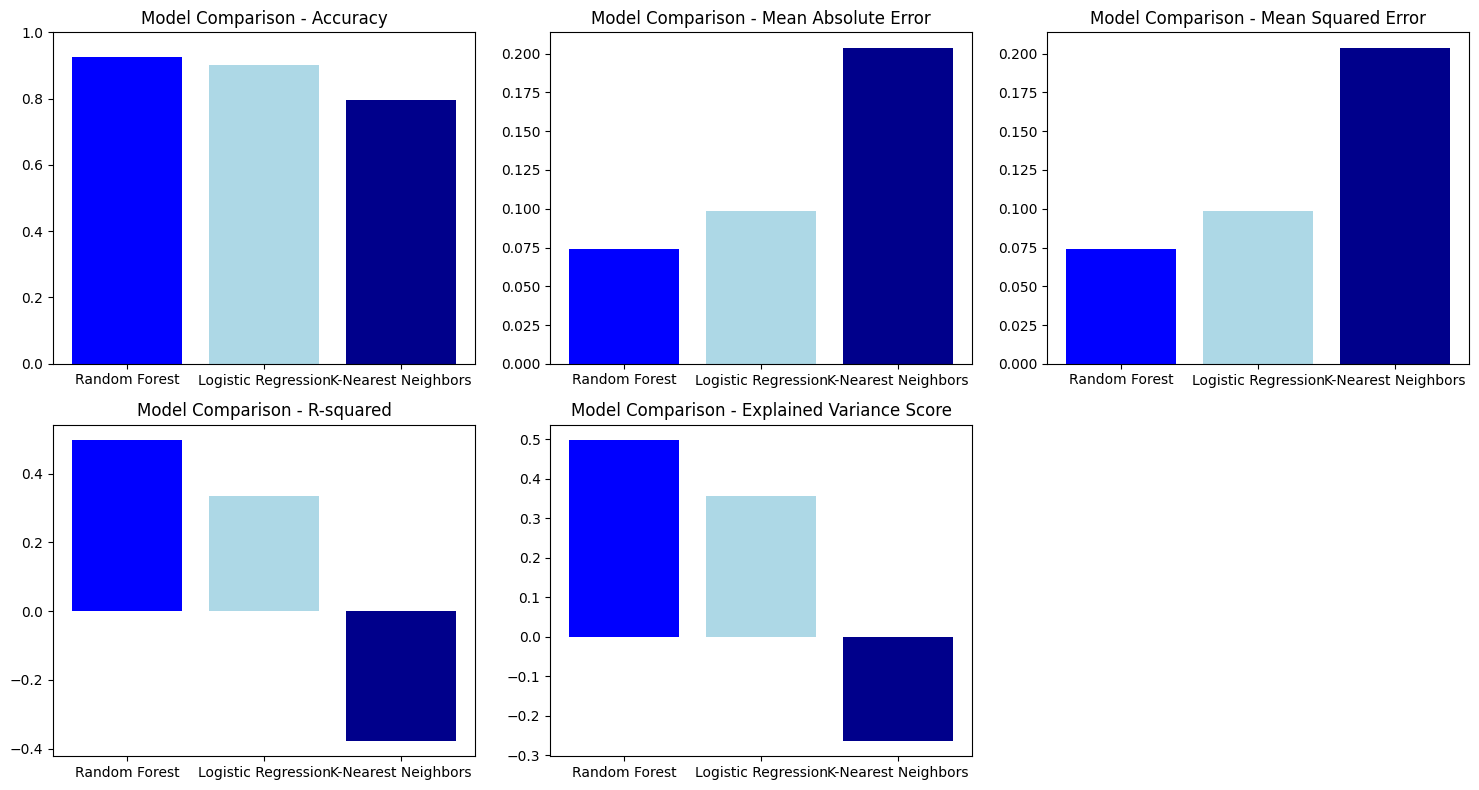

In [47]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors']
accuracies = [accuracy_rf, accuracy_logreg, accuracy_knn] 
mae_values = [mae_rf, mae_logreg, mae_knn] 
mse_values = [mse_rf, mse_logreg, mse_knn]  
r2_values = [r2_rf, r2_logreg, r2_knn] 
evs_values = [evs_rf, evs_logreg, evs_knn]  

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Subplot for accuracy
axs[0, 0].bar(models, accuracies, color=['Blue', 'lightblue', 'darkblue'])
axs[0, 0].set_title('Model Comparison - Accuracy')
axs[0, 0].set_ylim(0, 1)

# Subplot for mean absolute error
axs[0, 1].bar(models, mae_values, color=['Blue', 'lightblue', 'darkblue'])
axs[0, 1].set_title('Model Comparison - Mean Absolute Error')

# Subplot for mean squared error
axs[0, 2].bar(models, mse_values, color=['Blue', 'lightblue', 'darkblue'])
axs[0, 2].set_title('Model Comparison - Mean Squared Error')

# Subplot for R-squared
axs[1, 0].bar(models, r2_values, color=['Blue', 'lightblue', 'darkblue'])
axs[1, 0].set_title('Model Comparison - R-squared')

# Subplot for Explained Variance Score
axs[1, 1].bar(models, evs_values, color=['Blue', 'lightblue', 'darkblue'])
axs[1, 1].set_title('Model Comparison - Explained Variance Score')

# Hide the empty subplot in the last column and second row
axs[1, 2].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [48]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object with L1 regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # Adjust C :Controls the model's complexity


logreg_model.fit(X_train, y_train)


y_pred = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print('Logistic Regression Model:')
print('Accuracy:', accuracy_logreg)
print('Precision:', precision_logreg)
print('Recall:', recall_logreg)
print('F1-score:', f1_logreg)
print('Cross-Validation Accuracy:', np.mean(logreg_scores))  # logreg_scores from cross-validation


Logistic Regression Model:
Accuracy: 0.9017226148409894
Precision: 0.9119798234552333
Recall: 0.9741379310344828
F1-score: 0.9420346489514134
Cross-Validation Accuracy: 0.9171929311038746


In [49]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_rf = rf_model.predict(X_test)  

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print('Random Forest Model:')
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)
print('Cross-Validation Accuracy:', np.mean(rf_scores))

Random Forest Model:
Accuracy: 0.9257950530035336
Precision: 0.9612021857923497
Recall: 0.9477370689655172
F1-score: 0.9544221378187737
Cross-Validation Accuracy: 0.9273557498810874


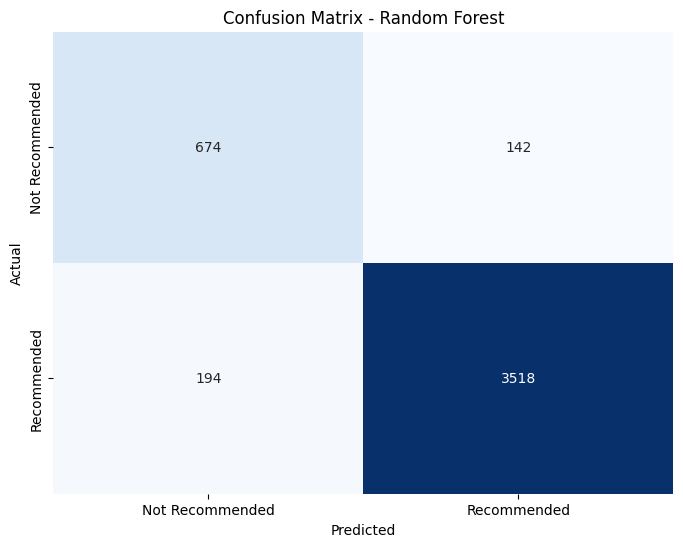

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

#using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Recommended', 'Recommended'],
            yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


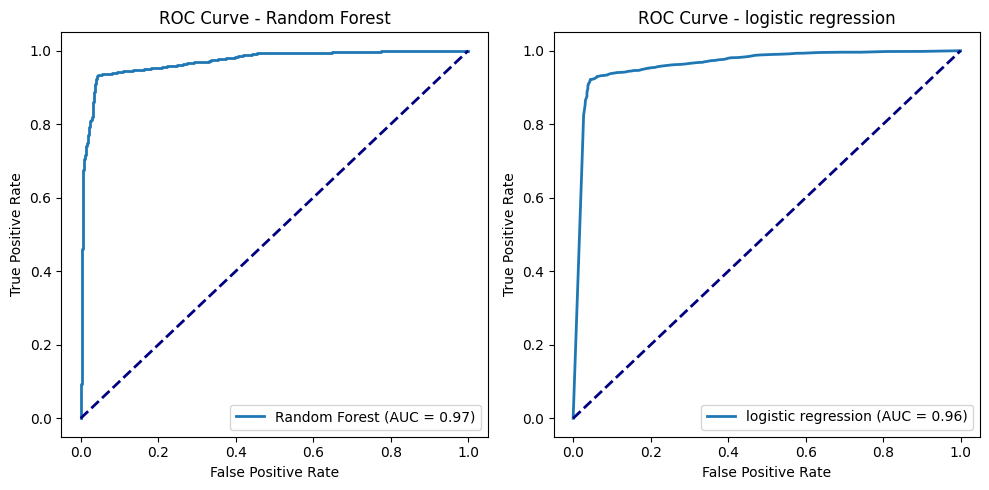

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def plot_roc_curve(model, X_test, y_test, model_name, ax):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(model_name, roc_auc))
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - {}'.format(model_name))
    ax.legend(loc='lower right')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve for Logistic Regression
plot_roc_curve(logreg_model, X_test, y_test, 'Random Forest', axs[0])

# Plot ROC curve for Random Forest
plot_roc_curve(rf_model, X_test, y_test, 'logistic regression', axs[1])

plt.tight_layout()
plt.show()
